In [1010]:
import numpy as np
import matplotlib.pyplot as plt

In [1011]:
import os
import shutil
import time

In [1012]:
dir_save = "../../.saves/" + "two kinks shape changing C T = 10 Cave = 0/" 

## Rescaling u(x)

The stationary solution, for **constant** $C>0$ is
$$u_c(x) = \sqrt{C}\tanh{[(x-\frac{L}{2})\sqrt{\frac{C}{2}}]}$$

Then, adopting PBC, this is not a solution, but there are still periodic solutions (w/ 2,4,... number of kinks).
If the kinks are far, we expect the above formula to describe the shape of the kinks in the periodic stationary states.

In order to check **graphically**, _simultaneoulsy_ for _different values of $C$_, **if that** is the shape of the kinks, we rescale x and y like this:

- $x\rightarrow x-L/2$, then we multiply by $\sqrt{2/L}$ and finally we readd $x'\rightarrow x'+L/2$    
- $y \rightarrow y/\sqrt{C}$

At this stage, if the shape of the kink is described by that formula, all the "rescaled" curves, for different values of $C$, should **all overlap** and be described by

$$y = \tanh(x-L/2)$$

### Adiabaticity
If $C=C(t)$ and it is varying slowly respect to the time $\tau$

Where $\tau$ is the time the system needs, when $C$ is constant (and equal to the value of $C(t)$, so $\tau = \tau_t$) to evolve from _any_ (maybe we can require something less strong) state to the stationary state $u_c$

Then we expect $u(x)$ to be, at any time, **following** the stationary state $u_c(x)$. And so we expect that, even if $C=C(t)$, the kink shape (rescaled) **is always the same** (it's always $y = \tanh(x-L/2))$.

### BUT the "adiabatic condition"

$$T >> \tau_t$$

is not always satisfyied, in particular is not satisfyied when:

- If $C(t)$ is varying close to zero, as when $C$ is constant and close to zero $\tau$ is big, then we expect the system to not evolve adiabatically at times $t$ when $C(t)\simeq 0$. Even if the period is very big.
- If $T$ is very small.

# Plot the final state u(x,tmax) for any experiment in the folder and MEASURE kink's height and width

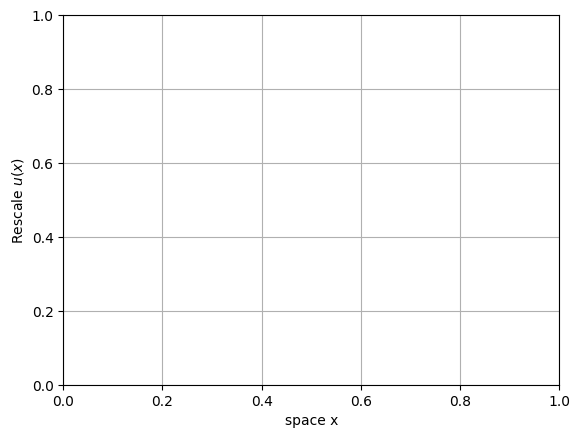

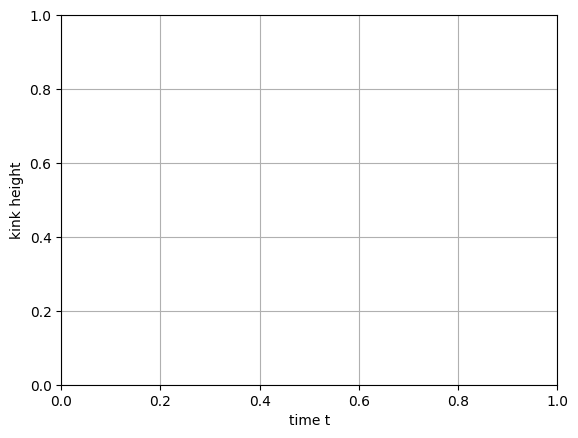

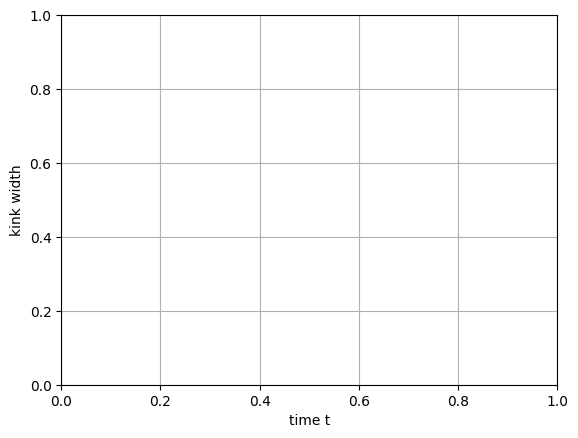

In [1013]:
# Create plot object for u(x,t)
fig, ax = plt.subplots()
ax.set_xscale("linear")
ax.set_xlabel("space x")
ax.set_ylabel("Rescale $u(x)$")
ax.set_yscale("linear")
ax.grid()

# Create plot object for height
fig_h, ax_h = plt.subplots()
ax_h.set_xscale("linear")
ax_h.set_xlabel("time t")
ax_h.set_ylabel("kink height")
ax_h.set_yscale("linear")
ax_h.grid()

# Create plot object for width
fig_w, ax_w = plt.subplots()
ax_w.set_xscale("linear")
ax_w.set_xlabel("time t")
ax_w.set_ylabel("kink width")
ax_w.set_yscale("linear")
ax_w.grid()

In [1014]:
# Select the plot xspan
xmin = 46
xmax = 56

ts = [] # Instants t of the plots
Cs = [] # Values of C(t) at the instants of the plots
hs = [] # Values of the kink's height at the above instants
ws = [] # Values of the kink's width at the above instants

for folder in sorted(os.listdir(dir_save), reverse=False):
    dir = dir_save + folder
    print(dir)

    f = open(dir + "/tdgl_result.dat", "r")
    N = 1000000000
    i = 0
    for row in f:
        if i != 0:
            a, b = row.split(" ")
            x[i-1] = float(a)
            y[i-1] = float(b)
        else:
            N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
            N = int(N)
            x = np.zeros(N)
            y = np.zeros(N)
            tmax = float(tmax)
            dx = float(dx)
            L = N*dx
            dt = float(dt)
            A = float(A)
            #print(Thalf)
            T = 2*float(Thalf)
            Cave = float(Cave)
        i = i + 1

    #x = x[0:i]
    f.close()
    
    # Label with the state's time
    state_time = tmax 
    state_time = round(state_time, 3)
    labell = "t = " + str(state_time) # Label with time (uncomment for custom label)
    if T < 0:
        labell = labell + " (initial)"  # For initial state preparation, C does not oscillate
    # Get custom label of the curve (use it only if it is not empty)
    f = open(dir + "/label.dat", "r")
    label = f.readline().strip('\n')
    f.close()
    if label != "":
        labell = label
    
    # Get last value of C (C at the time of the plotted state)
    f = open(dir + "/fileCout.dat", "r")
    for row in f:
        tt, C = row.split(" ") #Only the last row is interesting
    C = float(C)
    #print("C^1/3 = "+str(C**(1/3)))

    imin = int(xmin/dx)
    imax = int(xmax/dx)
    if xmin < 0:
        imin = 0
    if xmax > L or xmax < 0:
        imax = i
    #print(imin, imax)
    # If the evolution is adiabatic, we expect an analytical known shape,
    # So we rescale x and y to check if we see that shape
    
    # Rescale x
    x_resc = x[imin:imax-1]-(L/2)*np.ones(imax-imin-1)
    x_resc = x_resc*(np.sqrt(C/2))
    x_resc = x_resc+(L/2)*np.ones(imax-imin-1)
    y_resc = y[imin:imax-1]/np.sqrt(C)
    # Rescale y
    if np.abs(C) > 1e-5:   # If C=0 then the rescaled width is infinite!
        ax.plot(x_resc, y_resc, label = labell)

    # Measure height and width
    # Height
    i_height = int(len(x)/4)                           # CKECK w/ plot if there is Plateau at x=L/4 !!!
    height = 2*np.abs(y[i_height])
    # Width
    i_width = int(len(x)/2)
    while np.abs(y[i_width]) < (height/2)*np.tanh(1):
        #print(np.abs(y[i_width])-(height/2)*np.tanh(1))
        i_width = i_width + 1
    width = 2*(x[i_width]-L/2)

    ts.append(state_time)
    Cs.append(C)
    hs.append(height)
    ws.append(width)

#eps = 0.5
#plt.ylim(-1-eps,1+eps)

../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037221477
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037249906
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037251736
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037253369
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037254971
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037322262
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037324361
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037326129
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037328069
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037329594
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037331889
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037333577
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037686738
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709037688097
../../.saves/two kin

/tmp/ipykernel_5741/1873190389.py:72: RuntimeWarning: invalid value encountered in sqrt
  x_resc = x_resc*(np.sqrt(C/2))
/tmp/ipykernel_5741/1873190389.py:74: RuntimeWarning: invalid value encountered in sqrt
  y_resc = y[imin:imax-1]/np.sqrt(C)


../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043892495
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043894761
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043898658
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043909762
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043911428
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043912918
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043914351
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043915682
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043930136
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043944832
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043949513
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709043954769
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709044066376
../../.saves/two kinks shape changing C T = 10 Cave = 0/1709044086068
../../.saves/two kin

In [1015]:
# TITLE

title = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
title= title + "\ndt = " + str(dt)
if T > 0:
    title = title + "\nC(t) = " + str(Cave) + " + " + str(A) + "$\sin{2\pi t/" + str(T) + "}$"
else:
    title = title + "\nC = " + str(Cave)
title = title + "\nL = " + str(round(N*dx,3))
title = title + "\ndx = " + str(round(dx,3))
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"
ax.set_title(title)
ax_h.set_title(title)
ax_w.set_title(title)
#fig

#ax_h.plot(Cs, hs)
#fig_h
#ax_w.plot(Cs,ws)
#fig_w

Text(0.5, 1.0, '\ndt = 0.001\nC(t) = 0.0 + 1.0$\\sin{2\\pi t/10.0}$\nL = 100.0\ndx = 0.1')

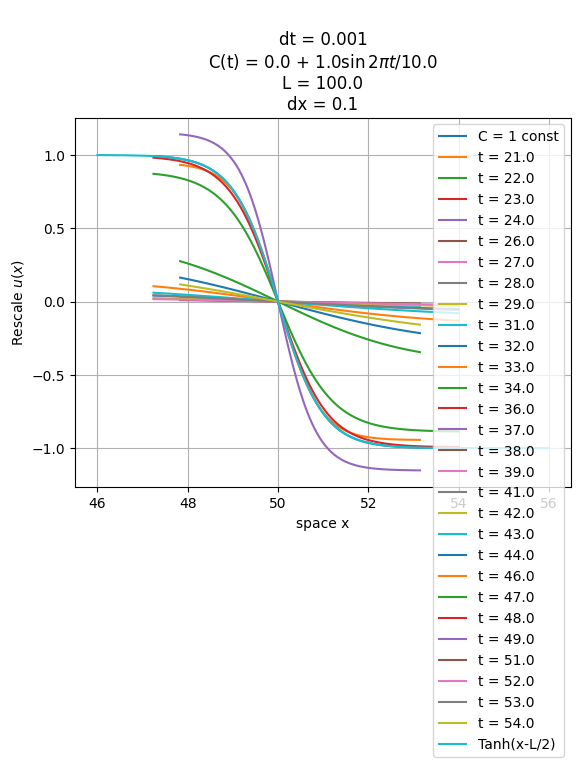

In [1016]:
# Plot analytical solution
Num = 1000
x_anal = np.arange(0,Num)/Num*(xmax-xmin)+xmin*np.ones(Num)
y = np.zeros(Num)
j = 0
xc = 50 # tanh center
for xi in x:
    y[j] = -np.tanh((x_anal[j]-xc))
    j = j + 1
ax.plot(x_anal,y,label="Tanh(x-L/2)")
ax.legend()
fig

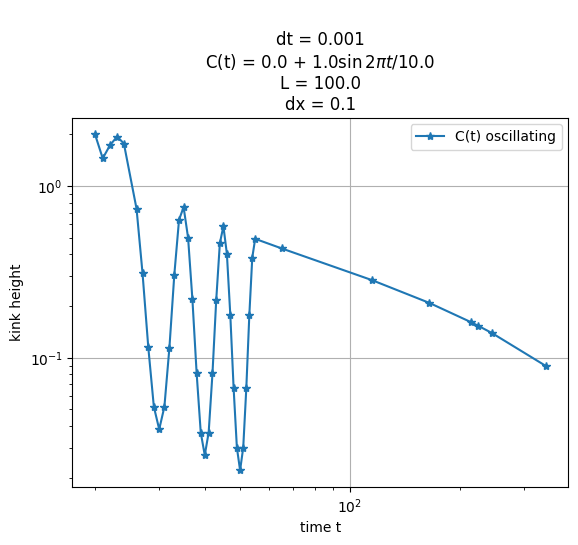

In [1017]:
# Kink's height

ax_h.plot(ts,hs,"-*",label="C(t) oscillating")
# Analytical if Adiabatic
#ax_h.plot(ts, 2*np.sqrt(Cs),".",label="C const")
ax_h.legend()
ax_h.set_xscale("log")
ax_h.set_yscale("log")
fig_h

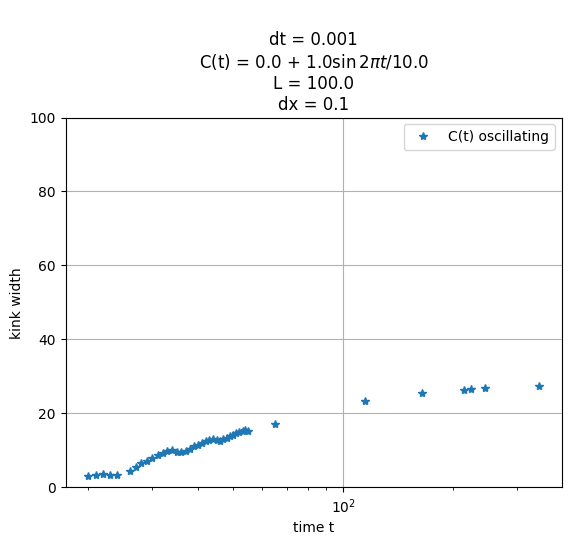

In [1018]:
# Kink's width
ax_w.plot(ts,ws,"*",label="C(t) oscillating")
# Analytical if Adiabatic
reciprocalCs = np.zeros(len(Cs))
i = 0
for C in Cs:
    reciprocalCs[i] = 1/C
    i = i + 1
#ax_w.plot(ts, 2**(3/2)*np.sqrt(reciprocalCs),".",label="C const")
ax_w.legend()
ax_w.set_ylim(0,100)
#ax_w.set_xscale("log")
fig_w

Text(0, 0.5, 'C(t)')

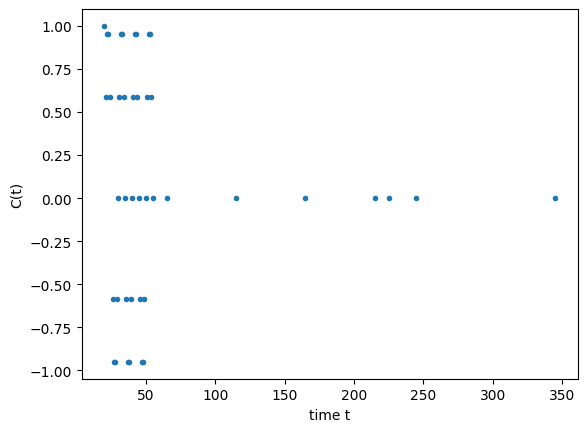

In [1019]:
plt.plot(ts,Cs,".")
plt.xlabel("time t")
plt.ylabel("C(t)")